# Projeto

## Classification

## Multi Layer Perceptron Approach

In [1]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "recall"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


### Parameters Study

MLP best for 750 iterations (lr_type=adaptive and lr=0.5
MLPClassifier(activation='logistic', learning_rate='adaptive',
              learning_rate_init=0.5, max_iter=250, solver='sgd',
              warm_start=True)
{'name': 'MLP', 'metric': 'recall', 'params': ('adaptive', 0.5, 750)}


<Figure size 600x450 with 0 Axes>

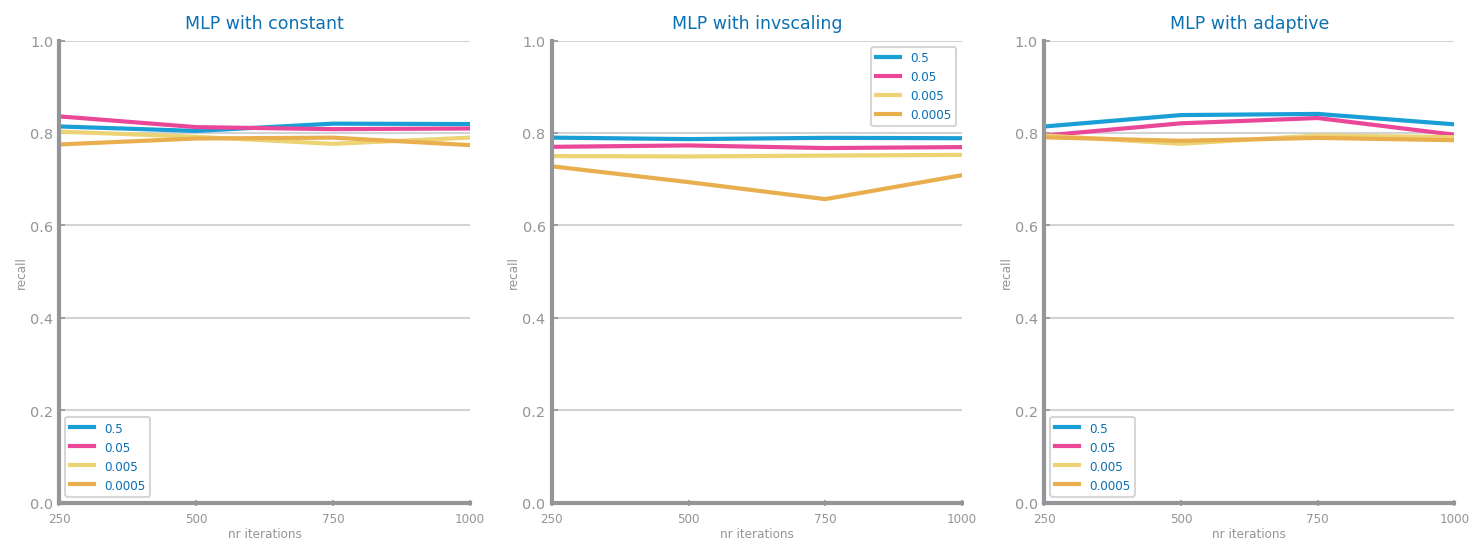

In [2]:
eval_metric="recall"
figure()
best_model, params = dslabs.mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=1000,
    lag=250,
    metric=eval_metric,
)
print(best_model)
print(params)
savefig(f'classification_images/mlp/{file_tag}_mlp_{eval_metric}_verbose_study.png')
show()

MLP best for 500 iterations (lr_type=adaptive and lr=0.5
MLPClassifier(activation='logistic', learning_rate='adaptive',
              learning_rate_init=0.5, max_iter=250, solver='sgd',
              warm_start=True)
{'name': 'MLP', 'metric': 'precision', 'params': ('adaptive', 0.5, 500)}


<Figure size 600x450 with 0 Axes>

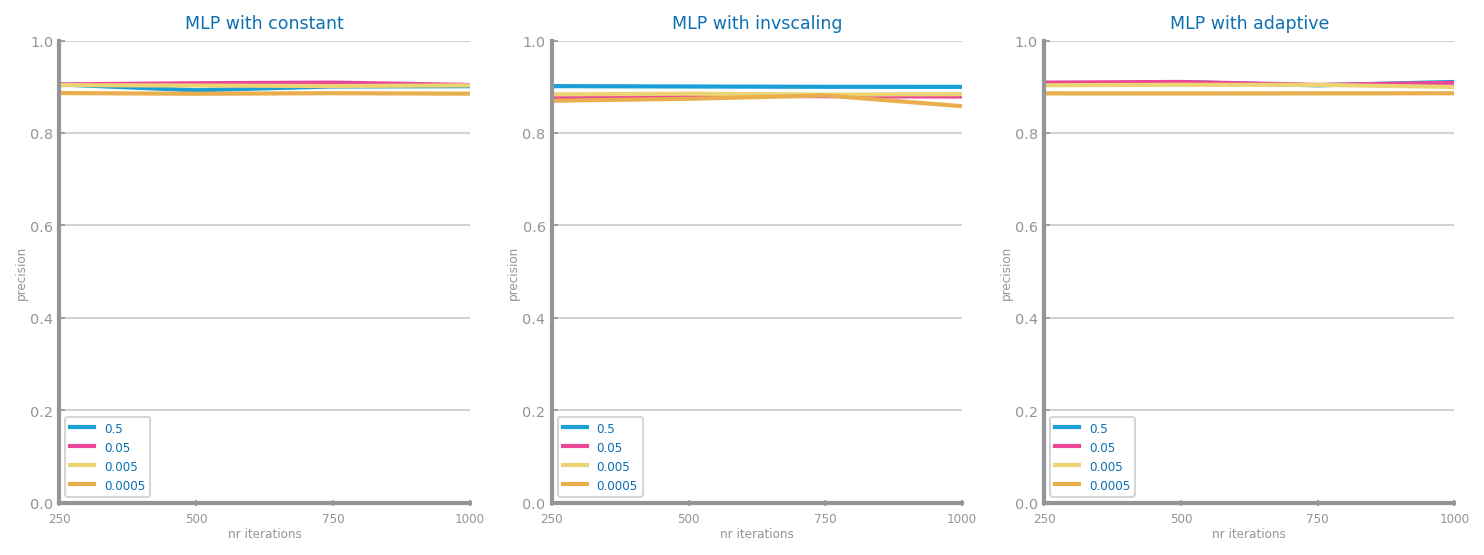

In [3]:
eval_metric="precision"
figure()
best_model, params = dslabs.mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=1000,
    lag=250,
    metric=eval_metric,
)
print(best_model)
print(params)
savefig(f'classification_images/mlp/{file_tag}_mlp_{eval_metric}_study.png')
show()

MLP best for 500 iterations (lr_type=constant and lr=0.5
MLPClassifier(activation='logistic', learning_rate_init=0.5, max_iter=250,
              solver='sgd', warm_start=True)
{'name': 'MLP', 'metric': 'accuracy', 'params': ('constant', 0.5, 500)}


<Figure size 600x450 with 0 Axes>

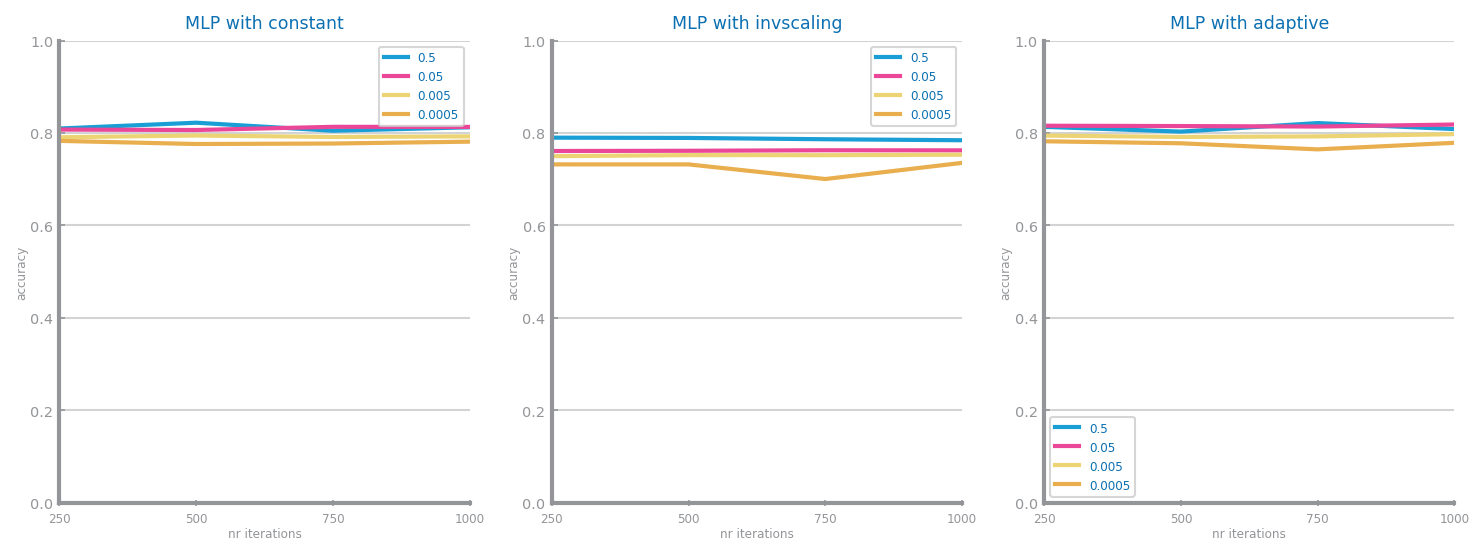

In [4]:
eval_metric="accuracy"
figure()
best_model, params = dslabs.mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=1000,
    lag=250,
    metric=eval_metric,
)
print(best_model)
print(params)
savefig(f'classification_images/mlp/{file_tag}_mlp_{eval_metric}_study.png')
show()

MLP best for 1000 iterations (lr_type=constant and lr=0.5
MLPClassifier(activation='logistic', learning_rate_init=0.5, max_iter=250,
              solver='sgd', warm_start=True)
{'name': 'MLP', 'metric': 'auc', 'params': ('constant', 0.5, 1000)}


<Figure size 600x450 with 0 Axes>

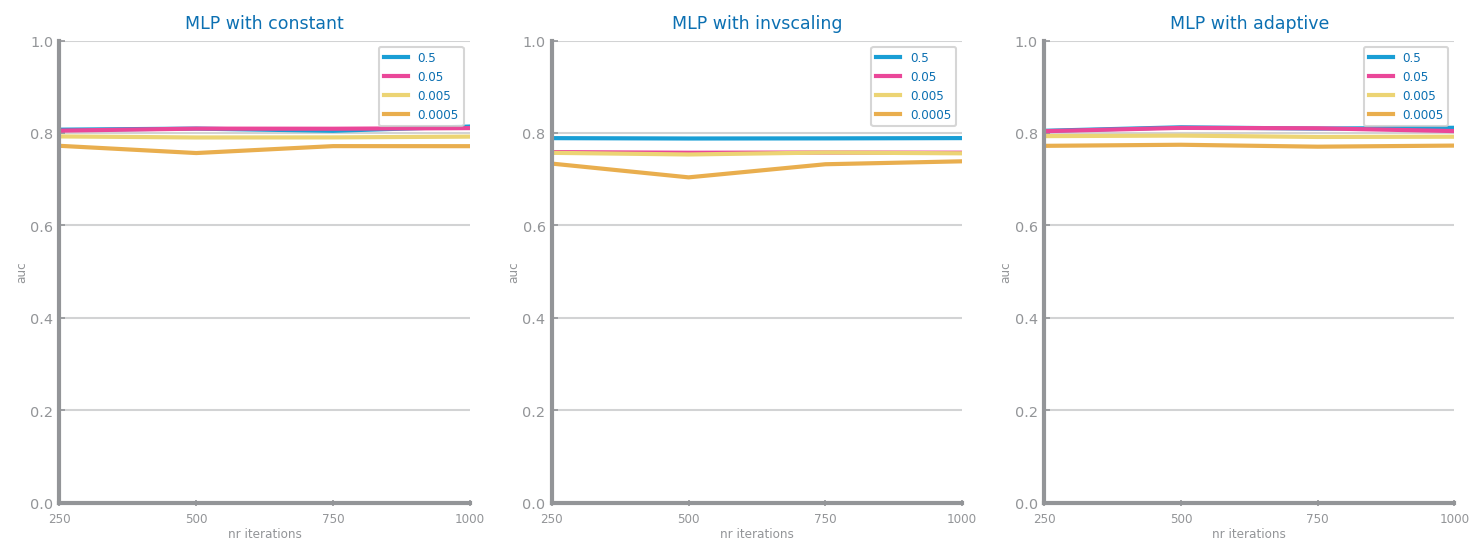

In [5]:
eval_metric="auc"
figure()
best_model, params = dslabs.mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=1000,
    lag=250,
    metric=eval_metric,
)
print(best_model)
print(params)
savefig(f'classification_images/mlp/{file_tag}_mlp_{eval_metric}_study.png')
show()

MLP best for 500 iterations (lr_type=constant and lr=0.5
MLPClassifier(activation='logistic', learning_rate_init=0.5, max_iter=250,
              solver='sgd', warm_start=True)
{'name': 'MLP', 'metric': 'f1', 'params': ('constant', 0.5, 500)}


<Figure size 600x450 with 0 Axes>

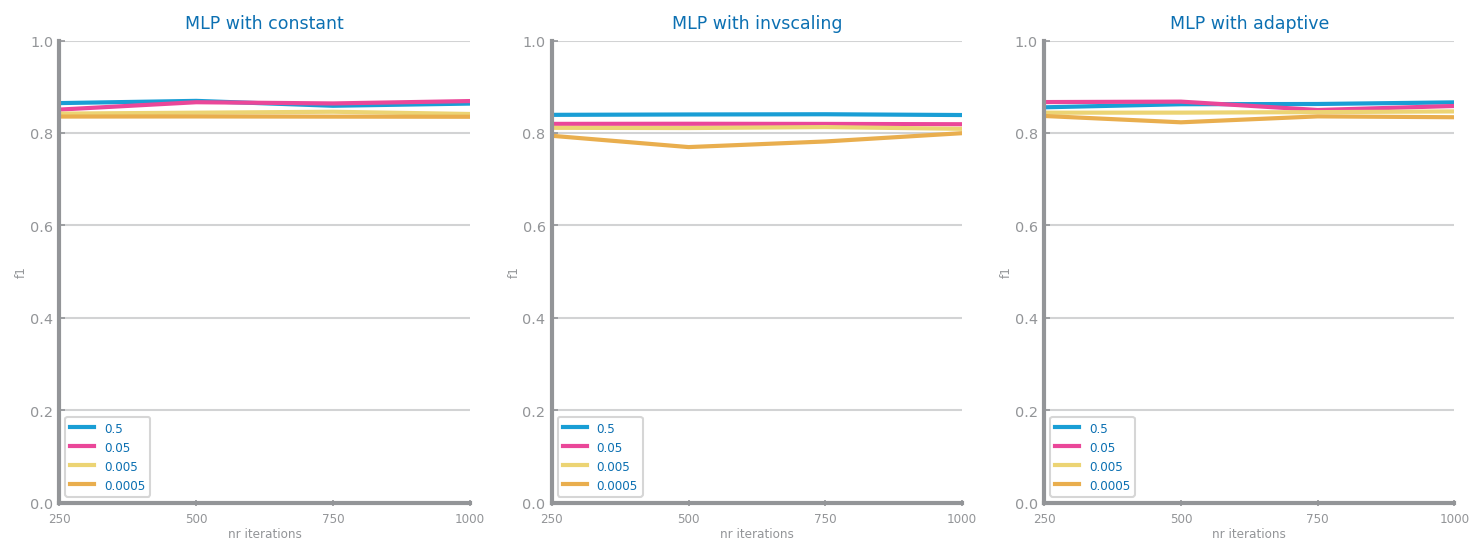

In [6]:
eval_metric="f1"
figure()
best_model, params = dslabs.mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=1000,
    lag=250,
    metric=eval_metric,
)
print(best_model)
print(params)
savefig(f'classification_images/mlp/{file_tag}_mlp_{eval_metric}_study.png')
show()

### Best Model Performance

<Figure size 600x450 with 0 Axes>

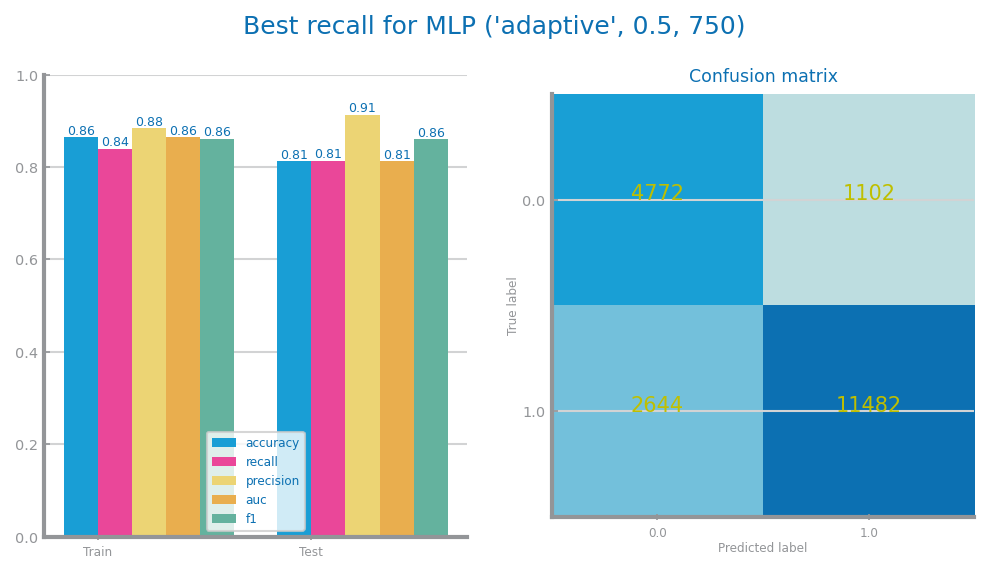

In [3]:
from sklearn.neural_network import MLPClassifier

best_model =  MLPClassifier(activation='logistic', learning_rate='adaptive', learning_rate_init=0.5, max_iter=250, solver='sgd', warm_start=True)
params = {'name': 'MLP', 'metric': 'recall', 'params': ('adaptive', 0.5, 750)}
best_model.fit(trnX, trnY)

prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/mlp/Credit_Score_MLP_best_recall_750it.png')
show()

<Figure size 600x450 with 0 Axes>

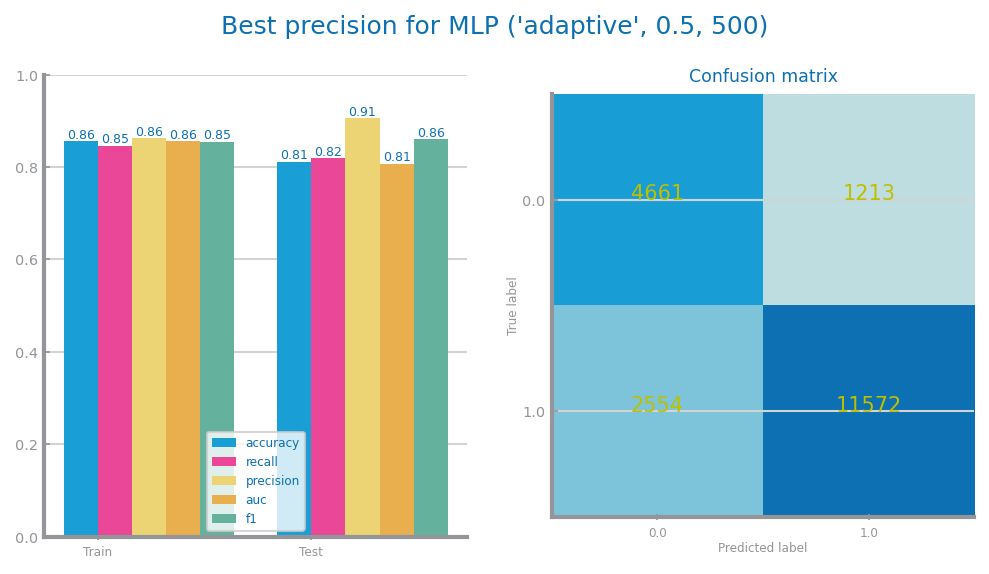

In [14]:
from sklearn.neural_network import MLPClassifier

best_model =  MLPClassifier(activation='logistic', learning_rate='adaptive', learning_rate_init=0.5, max_iter=250, solver='sgd', warm_start=True)
params = {'name': 'MLP', 'metric': 'precision', 'params': ('adaptive', 0.5, 500)}
best_model.fit(trnX, trnY)

prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/mlp/{file_tag}_mlp_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Overfitting Study

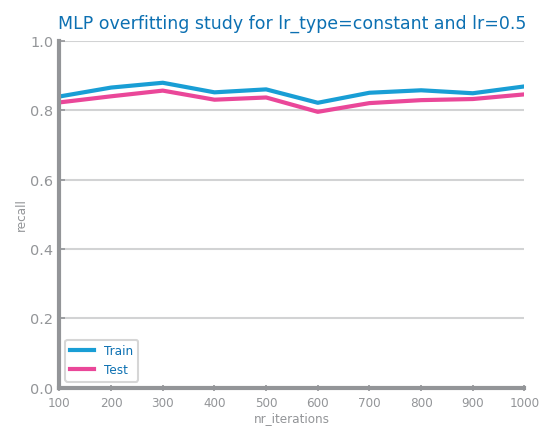

In [8]:
from typing import Literal
from sklearn.neural_network import MLPClassifier
eval_metric="recall"
lr_type: Literal["constant", "invscaling", "adaptive"] = params["params"][0]
lr: float = params["params"][1]
nr_iterations: list[int] = [i for i in range(100, 1001, 100)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "recall"

warm_start: bool = False
for n in nr_iterations:
    clf = MLPClassifier(
        warm_start=warm_start,
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="sgd",
        verbose=False,
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: np.array = clf.predict(tstX)
    prd_trn_Y: np.array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
dslabs.plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/mlp/{file_tag}_mlp_{eval_metric}_overfitting.png")

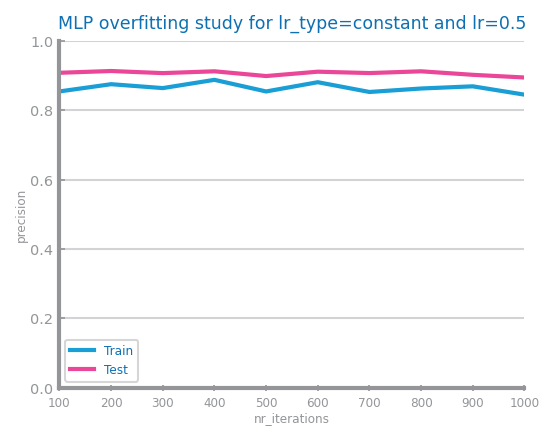

In [9]:
from typing import Literal
from sklearn.neural_network import MLPClassifier
eval_metric="precision"
lr_type: Literal["constant", "invscaling", "adaptive"] = params["params"][0]
lr: float = params["params"][1]
nr_iterations: list[int] = [i for i in range(100, 1001, 100)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "precision"

warm_start: bool = False
for n in nr_iterations:
    clf = MLPClassifier(
        warm_start=warm_start,
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="sgd",
        verbose=False,
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: np.array = clf.predict(tstX)
    prd_trn_Y: np.array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
dslabs.plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/mlp/{file_tag}_mlp_{eval_metric}_overfitting.png")